# Gliederung

[//]: # (
    Frame the problem and look at the big picture.
    Get the data.
    Explore the data to gain insights.
    Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
    Explore many different models and short-list the best ones.
    Fine-tune your models and combine them into a great solution.
    Present your solution.
    Launch, monitor, and maintain your system.
)

1. [Aufgabenstellung](#1-problem--aufgabenstellung)
2. [Import](#2-import)
3. [Exploration](3-#exploration).
4. [Vorbereitung / Feauture Engineering]()
5. [Modellierung]()
6. [Ergebnis]()


# 1. Problem / Aufgabenstellung

[//]: # (Frame the problem and look at the big picture.)

Kategorien der Verbrechen in San Francisco sollen vorhergesagt werden.
Dabei werden die Kategorien *Larceny/Theft*, *Assault*, *Drug/Narcotic*, *Vehicle Theft* und *Burglary* betrachtet

Zur Vorhersage soll **eine** dieser Methoden verwendet werden: Regression, Klassifikation oder Clustering



# 2. Import

In [1]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\sampleSubmission.csv
data\SF Find Neighborhoods.geojson
data\test.csv
data\train.csv


In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
train['Dates'] = pd.to_datetime(train['Dates'])

print('First date: ', str(train['Dates'].min()))
print('Last date: ', str(train['Dates'].max()))
print('Train data shape: ', train.shape)

First date:  2003-01-06 00:01:00
Last date:  2015-05-13 23:53:00
Train data shape:  (878049, 9)


# 3. Exploration

## Selektion

Die Daten werden so gefiltert, dass nur *Larceny/Theft*, *Assault*, *Drug/Narcotic*, *Vehicle Theft* und *Burglary* als Kategorien vertreten sind.

In [4]:
train["Category"].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [5]:
categories = [i.upper() for i in ["Larceny/Theft", "Assault", "Drug/Narcotic", "Vehicle Theft", "Burglary"]]

train = train.loc[train["Category"].isin(categories)]

train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564


## Datentypen

In [6]:
train.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object

Hier kann man einige Datentypen konvertieren:

Dates -> DateTime
Category -> String
Descript -> String
DayOfWeek -> String
PdDistrict -> String
Resolution -> String

neue Spalte für CategoryID als Integer
neue Spalte für PdDisctrictID als Integer
neue Spalte für DayOfWeekID als Integer
neue Spalte für ResolutionID als Integer

In [7]:
train["Dates"] = pd.to_datetime(train["Dates"])
train["YearMonth"] = train['Dates'].dt.strftime('%Y-%m')
train["Year"] = train['Dates'].dt.strftime('%Y')
train["TimeOfDay"] = train['Dates'].dt.strftime('%H')
train["DayOfWeekId"] = train['Dates'].dt.weekday + 1

## Duplikate


In [8]:
train.duplicated().sum()

923

In [9]:
train.drop_duplicates(inplace=True)

## Koordinaten

Im nächsten Schritt wird betrachtet, ob die Koordinaten falsche Werte enthalten könnten.

In [10]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\fried\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\fried\AppData\Local\Temp\ipykernel_4644\3780519853.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


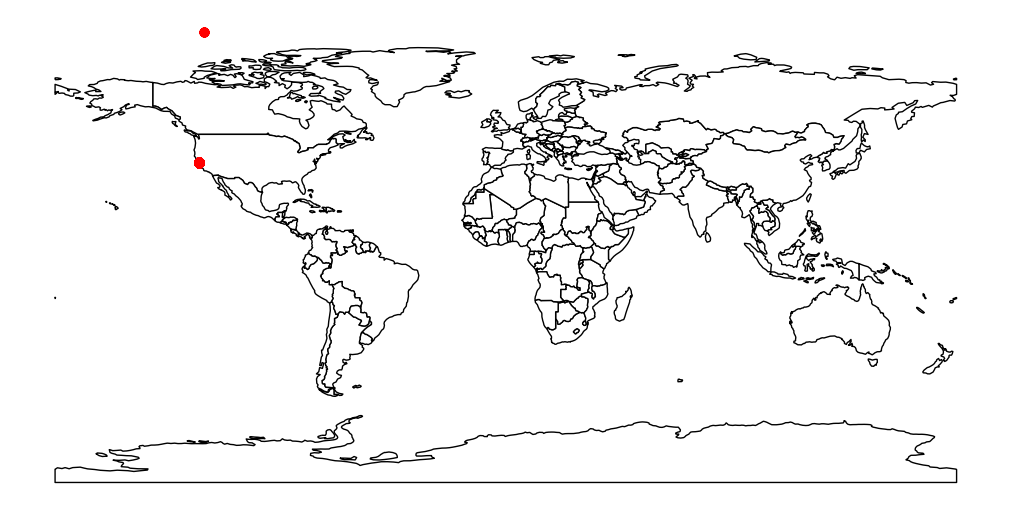

In [11]:
def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))
    gdf.Coordinates = gdf.Coordinates.apply(Point)
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

train_gdf = create_gdf(train)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

world.plot(ax=ax, color='white', edgecolor='black')
train_gdf.plot(ax=ax, color='red')

ax.set_aspect('equal', adjustable='box')

sns.despine(ax=ax, left=True, right=True, top=True, bottom=True)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])


plt.show()

Ein Blick auf die Karte genügt um zu sehen, dass sich einige Punkte außerhalb der USA und außerhalb von San Fransisco befinden.

In [12]:
print(train_gdf.loc[train_gdf.Y > 50].count()[0])
train_gdf.loc[train_gdf.Y > 50].sample(5)

29


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,YearMonth,Year,TimeOfDay,DayOfWeekId,Coordinates
823378,2003-09-21 13:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,BAYVIEW,NONE,GILMAN AV / FITCH ST,-120.5,90.0,2003-09,2003,13,7,POINT (-120.50000 90.00000)
677268,2005-10-06 17:30:00,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Thursday,RICHMOND,NONE,AVENUE OF THE PALMS / EUCLID AV,-120.5,90.0,2005-10,2005,17,4,POINT (-120.50000 90.00000)
678326,2005-10-04 09:00:00,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Tuesday,INGLESIDE,NONE,PERSIA AV / LAGRANDE AV,-120.5,90.0,2005-10,2005,09,2,POINT (-120.50000 90.00000)
842261,2003-06-25 07:30:00,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Wednesday,RICHMOND,NONE,JOHN F KENNEDY DR / MARTIN LUTHER KING JR DR,-120.5,90.0,2003-06,2003,07,3,POINT (-120.50000 90.00000)
759397,2004-08-03 19:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,LARKIN ST / AUSTIN ST,-120.5,90.0,2004-08,2004,19,2,POINT (-120.50000 90.00000)


In [13]:
from sklearn.impute import SimpleImputer

In [14]:
train.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)
test.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)

imp = SimpleImputer(strategy='mean')

for district in train['PdDistrict'].unique():
    train.loc[train['PdDistrict'] == district, ['X', 'Y']] = imp.fit_transform(
        train.loc[train['PdDistrict'] == district, ['X', 'Y']])
    test.loc[test['PdDistrict'] == district, ['X', 'Y']] = imp.transform(
        test.loc[test['PdDistrict'] == district, ['X', 'Y']])

train_gdf = create_gdf(train)

C:\Users\fried\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


## Fehlende Werte

In [15]:
train.isnull().sum()

Dates          0
Category       0
Descript       0
DayOfWeek      0
PdDistrict     0
Resolution     0
Address        0
X              0
Y              0
YearMonth      0
Year           0
TimeOfDay      0
DayOfWeekId    0
dtype: int64

Wie oben zu sehen, gibt es keine fehlenden Werte in diesem Datensatz



In [16]:
train["Category"].unique()

array(['LARCENY/THEFT', 'VEHICLE THEFT', 'ASSAULT', 'BURGLARY',
       'DRUG/NARCOTIC'], dtype=object)

## Korrelation der Spalten



In [17]:

import seaborn as sns
colors = sns.color_palette(None, 5)

C:\Users\fried\AppData\Local\Temp\ipykernel_4644\2362188612.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([truncate_label(label.get_text()) for label in ax.get_xticklabels()])


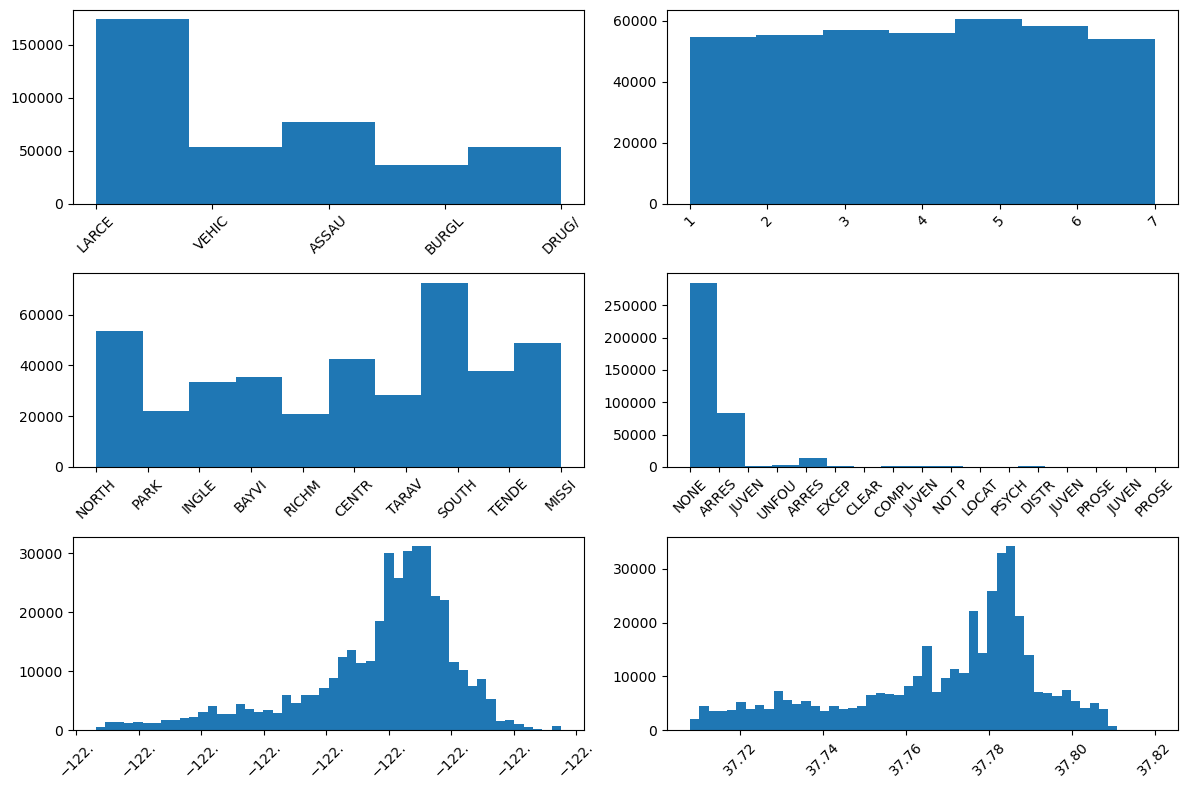

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def truncate_label(label, length=5):
    return label[:length]

colors = sns.color_palette(None, 3)
columns = ["DayOfWeek", "PdDistrict", "Resolution"]


fig, axes = plt.subplots(3, 2, figsize = (12, 8), tight_layout=True)

axes[0, 0].hist(train["Category"], bins=5, align="mid")
axes[0, 1].hist(train["DayOfWeekId"], bins=7, align="mid")
axes[1, 0].hist(train["PdDistrict"], align="mid", bins=len(train["PdDistrict"].unique()))
axes[1, 1].hist(train["Resolution"], align="mid", bins=len(train["Resolution"].unique()))
axes[2, 0].hist(train["X"], align="mid", bins=50)
axes[2, 1].hist(train["Y"], align="mid", bins=50)

# Rotate x-axis tick labels
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_ticks_position('bottom')  # Place ticks at the bottom for better visibility
    ax.set_xticklabels([truncate_label(label.get_text()) for label in ax.get_xticklabels()])

plt.tight_layout()

plt.show()

In [19]:
train.dtypes

Dates          datetime64[ns]
Category               object
Descript               object
DayOfWeek              object
PdDistrict             object
Resolution             object
Address                object
X                     float64
Y                     float64
YearMonth              object
Year                   object
TimeOfDay              object
DayOfWeekId             int32
dtype: object

In [20]:

train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,YearMonth,Year,TimeOfDay,DayOfWeekId
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05,2015,23,3
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05,2015,23,3
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,2015-05,2015,23,3
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,2015-05,2015,23,3
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015-05,2015,23,3


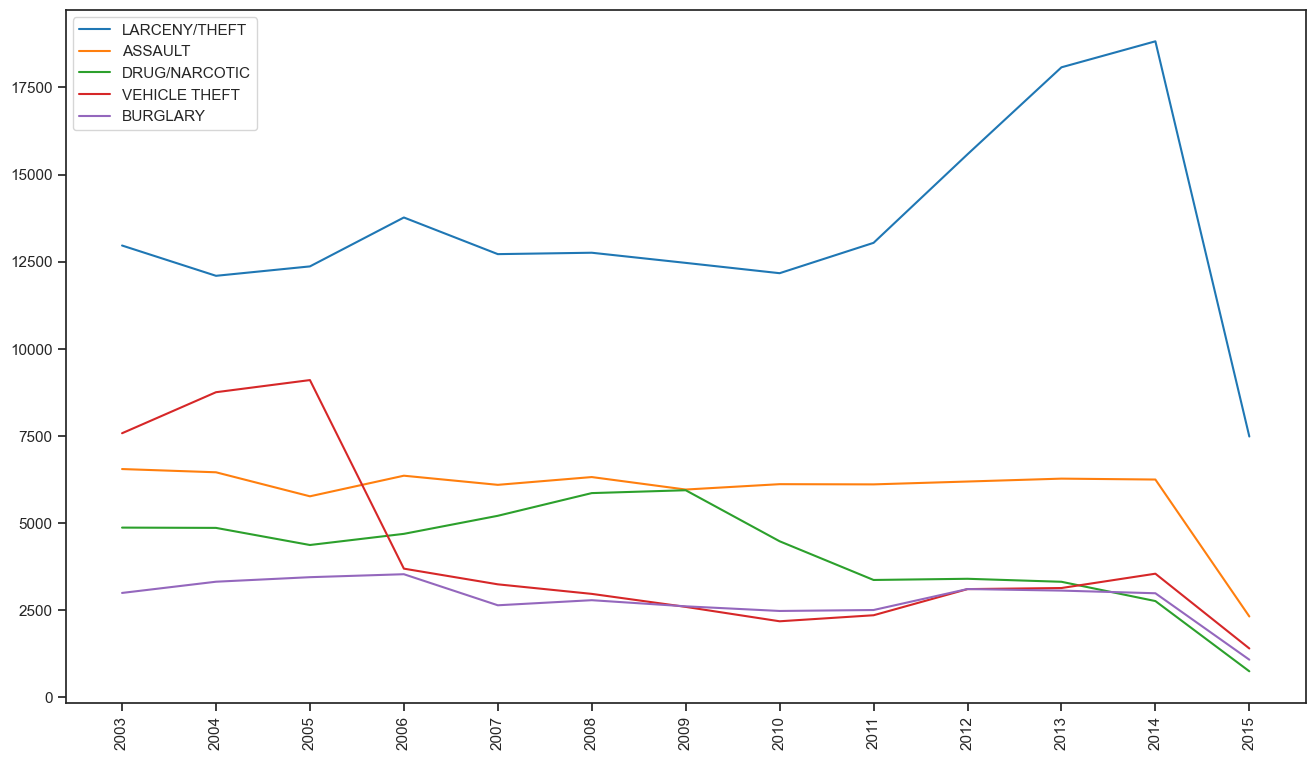

In [21]:
sns.set_style("ticks")
sns.set_context('notebook', font_scale = 1)

train_year_cat = train.groupby(by=["Year", "Category"], as_index=False).count()
data = train_year_cat.pivot_table(index="Year", columns="Category", values="Descript")

fig = plt.figure(figsize=(16,9))

for category in categories:
    plt.plot(data[category], label=category)

plt.legend(loc="upper left")
tix = plt.xticks()[0]
plt.xticks(tix, rotation=90, ha="center")
plt.show()


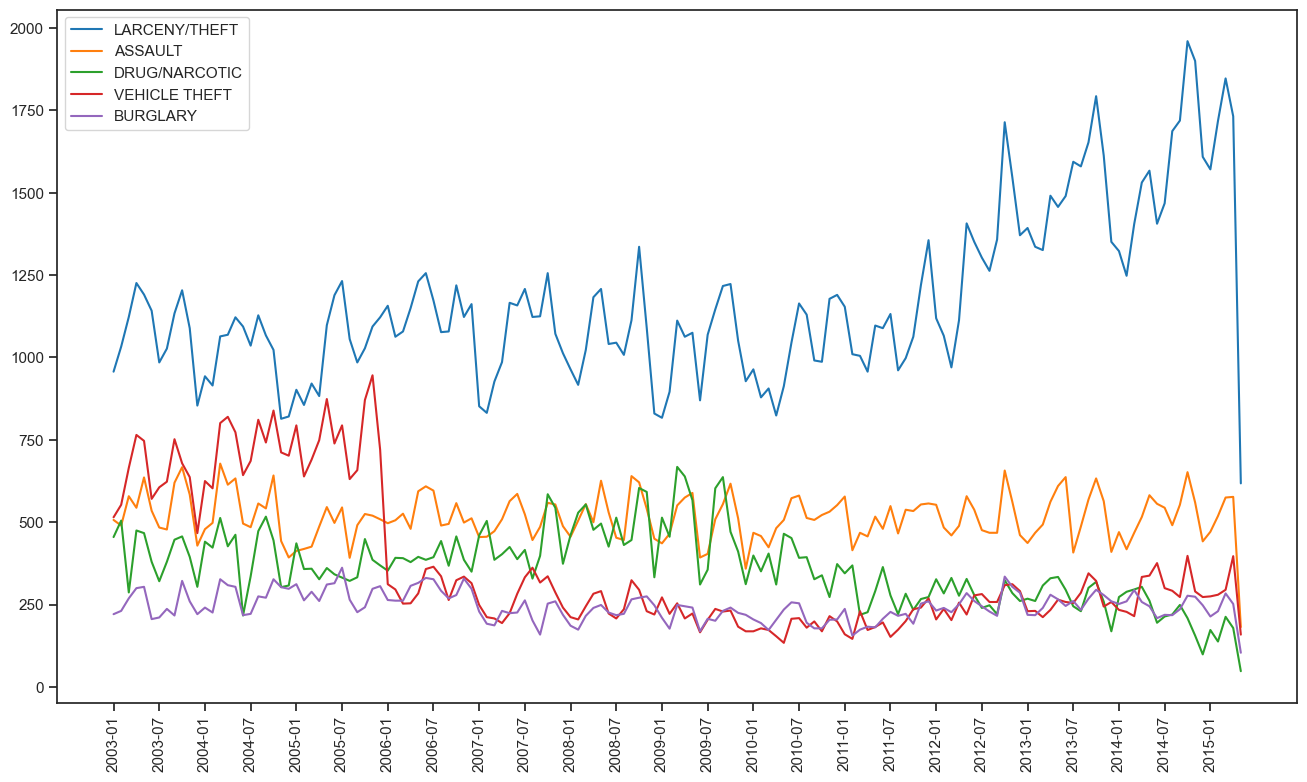

In [22]:
train_yearmonth_cat = train.groupby(by=["YearMonth", "Category"], as_index=False).count()
data = train_yearmonth_cat.pivot_table(index="YearMonth", columns="Category", values="Descript")

fig = plt.figure(figsize=(16,9))

for category in categories:
    plt.plot(data[category], label=category)

plt.legend(loc="upper left")
tix = plt.xticks()[0]
plt.xticks(tix[::6], rotation=90, ha="center")
plt.show()

In [23]:
import geopandas

from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely.geometry import Polygon, MultiPolygon

import geopandas as gpd
import geoplot as gplt

sf_df = geopandas.read_file("data/SF Find Neighborhoods.geojson").to_crs({'init': 'epsg:4326'})

geometry = [Point(xy) for xy in zip(train.X, train.Y)]
train_gdf = GeoDataFrame(train, crs="EPSG:4326", geometry=geometry)


point = train_gdf
poly  = sf_df
from geopandas.tools import sjoin
pointInPolys = sjoin(point, poly, how='left')
grouped = pointInPolys.groupby('index_right').count()

C:\Users\fried\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\fried\AppData\Local\Temp\ipykernel_4644\1729029889.py:19: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  pointInPolys = sjoin(point, poly, how='left')


In [24]:
heat_districts = pointInPolys.groupby('index_right')["Dates"].count()
heat_districts

index_right
0.0       239
1.0       450
2.0        36
3.0       465
4.0      5046
         ... 
112.0     579
113.0     591
114.0    1664
115.0     226
116.0     191
Name: Dates, Length: 117, dtype: int64

In [25]:

geom = sf_df.pop('geometry')
sf_df = sf_df.join(geom, how='inner')
sf_df["polygons"] = ""
for i,row in sf_df.iterrows():
    geometry = row["geometry"]
    # Check if the geometry is a MultiPolygon
    if geometry.geom_type == 'MultiPolygon':
        # Extract individual Polygons
        polygons = []
        for polygon in geometry.geoms:
            exterior_coords = list(polygon.exterior.coords)
            interior_coords = [list(interior.coords) for interior in polygon.interiors]
            polygons.append(Polygon(exterior_coords, interior_coords))
    else:
        # If it's not a MultiPolygon, create a list with the single Polygon
        polygons = [Polygon(list(geometry.exterior.coords))]
    sf_df.at[i, "polygons"] = polygons

sf_df["polygons"] = sf_df["polygons"].explode()

sf_df["index_right"] = sf_df.index
sf_df["heat"] = sf_df.merge(heat_districts, on="index_right")["Dates"]
sf_df["geometry"] = sf_df["polygons"]

gdf = gpd.GeoDataFrame(sf_df)




C:\Users\fried\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


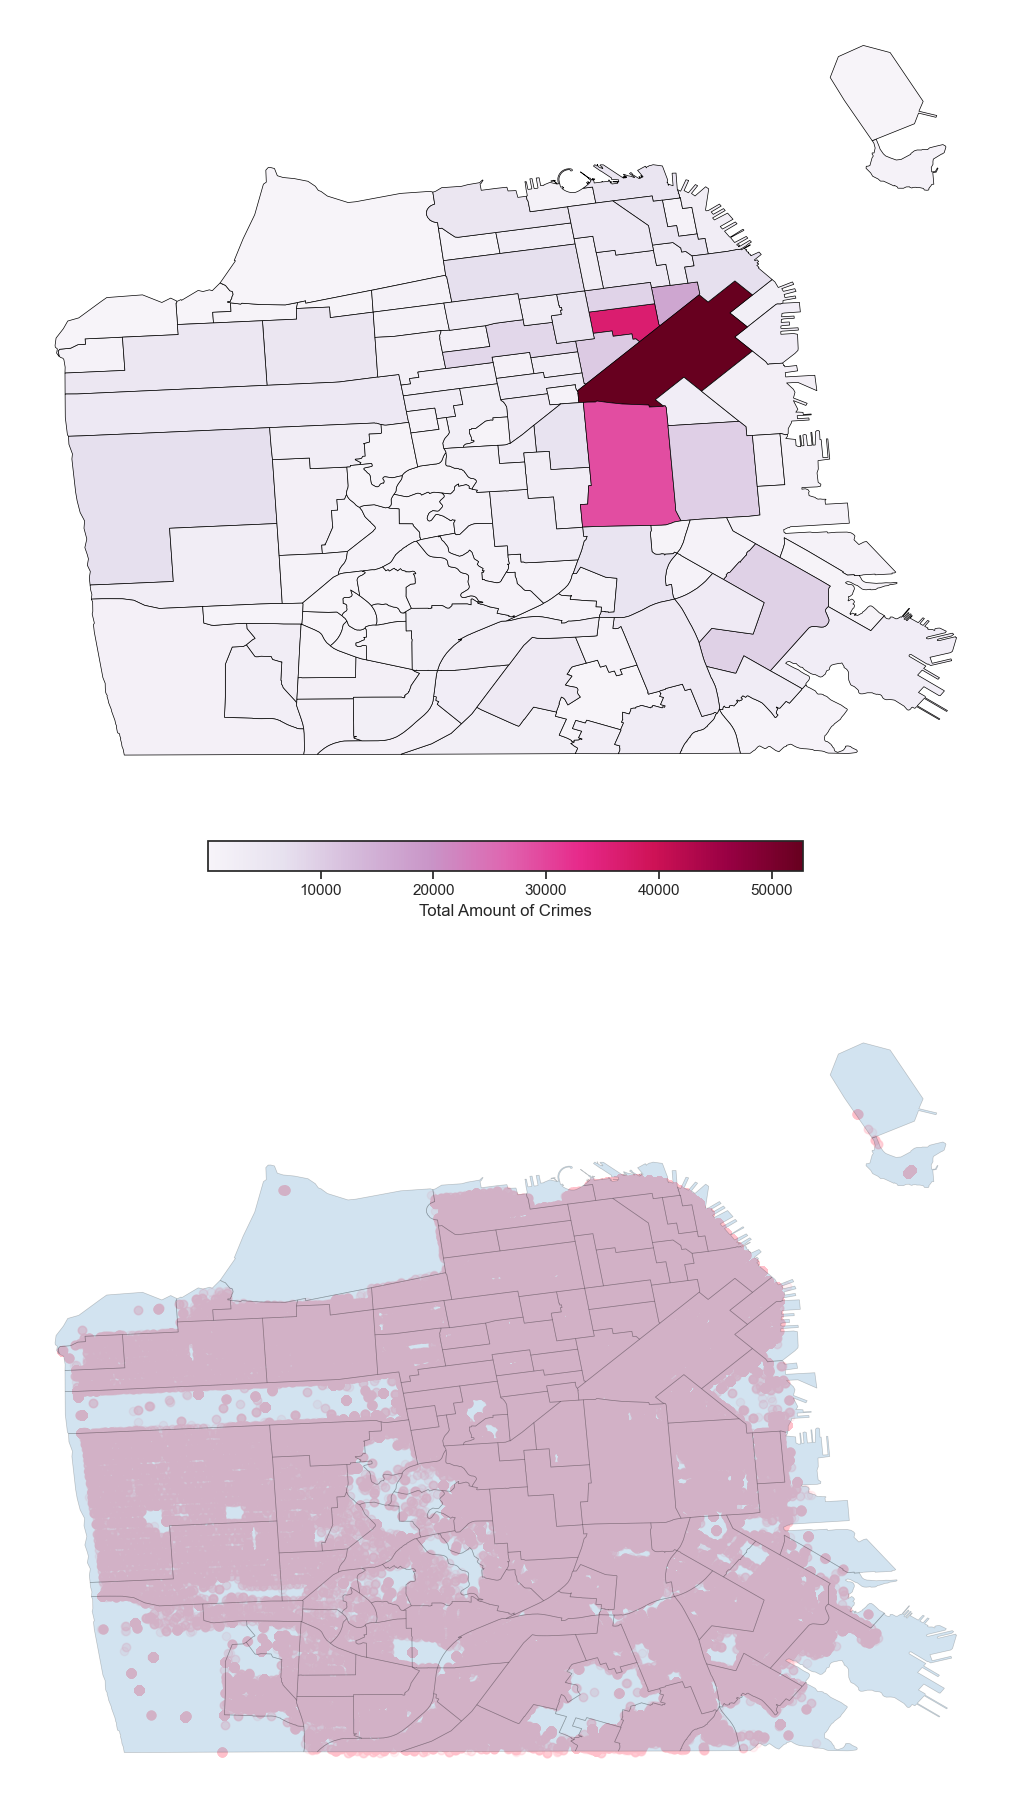

In [26]:
fig, ax = plt.subplots(2,1,figsize=(10, 20), sharey=True, layout='constrained')

gdf.plot(ax=ax[0], alpha=1, edgecolor='k', linewidth=0.5, column="heat", cmap="PuRd")
cbar = plt.colorbar(ax[0].get_children()[0], ax=ax[0], orientation="horizontal", shrink=0.6)
cbar.set_label("Total Amount of Crimes")

sf_df = geopandas.read_file("data/SF Find Neighborhoods.geojson").to_crs({'init': 'epsg:4326'})
sf_df.plot(ax=ax[1], alpha=0.2, edgecolor='k', linewidth=0.5, zorder=2)
ax[1].scatter(data=train.loc[train["Y"]<80], x="X", y="Y",alpha=0.2, color="pink", zorder=1)

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())
ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')

sns.despine(ax=ax[0], left=True, right=True, top=True, bottom=True)
sns.despine(ax=ax[1], left=True, right=True, top=True, bottom=True)

ax[0].xaxis.set_ticks([])
ax[0].yaxis.set_ticks([])

ax[1].xaxis.set_ticks([])
ax[1].yaxis.set_ticks([])    
    
plt.show()



In [27]:
df_district_cat = pd.crosstab(train['Category'], train['PdDistrict'])
df_district_cat.head()

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
ASSAULT,9845,6971,8522,11146,8312,3512,3198,12175,5460,7674
BURGLARY,3914,4499,3327,3736,5827,2875,2683,4796,3459,1484
DRUG/NARCOTIC,4496,1805,2372,8750,4508,2570,999,9222,1529,17668
LARCENY/THEFT,10075,24973,10207,18201,28566,9118,9845,41660,11807,9868
VEHICLE THEFT,7199,4208,8950,7134,6286,3955,4114,4722,6133,1005


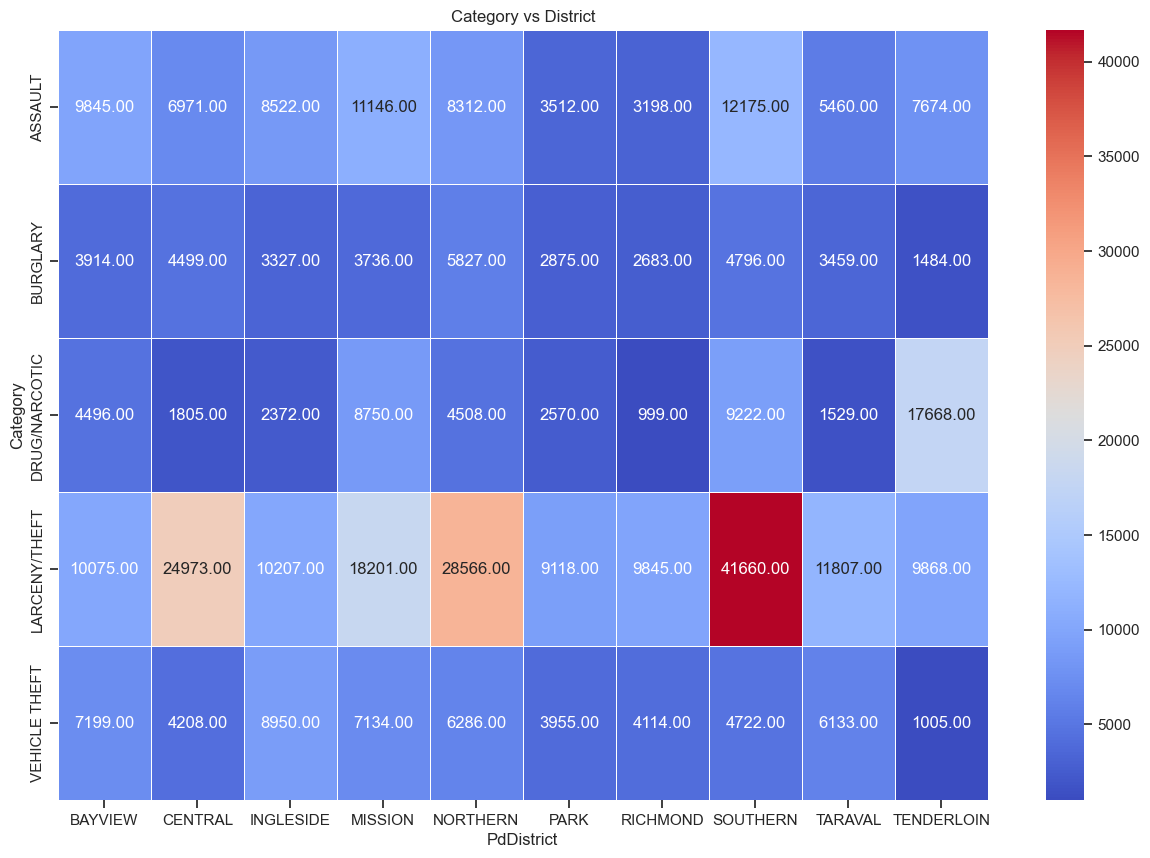

In [28]:

plt.figure(figsize=(15, 10))
sns.heatmap(df_district_cat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Category vs District')
plt.show()

In [29]:
train.nunique()

Dates          216686
Category            5
Descript          267
DayOfWeek           7
PdDistrict         10
Resolution         17
Address         21077
X               30739
Y               30739
YearMonth         149
Year               13
TimeOfDay          24
DayOfWeekId         7
dtype: int64

In [30]:
#TODO: Spalten automatisch auswählen nach Anzahl von unique values 
#corr_columns = list(train.select_dtypes(include=['object']).columns)
corr_columns = ['Category',
               'Descript',
               'PdDistrict',
               'Resolution',
               'YearMonth',
               'Year',
               'DayOfWeek',
               'TimeOfDay']

In [40]:
from itertools import product
from scipy import stats

x = [i[0] for i in product(corr_columns, corr_columns)]
y = [i[1] for i in product(corr_columns, corr_columns)]

corr_df = pd.DataFrame(index=corr_columns, columns=corr_columns)
corr_df.loc["Category", "Descript"] = 0

for i in range(0,len(x)):
    if x[i] == y[i]:
        corr_df.loc[x[i], y[i]] = 1
        corr_df.loc[y[i], x[i]] = 1
    if pd.isnull(corr_df.loc[x[i], y[i]]):
        temp_ct = pd.crosstab(train[x[i]], train[y[i]])
        
        X2 = stats.chi2_contingency (temp_ct, correction= False )[0]
        n = sum(temp_ct.sum())
        minDim = min( temp_ct.shape )-1
        
        #calculate Cramer's V
        V = np.sqrt((X2/n) / minDim)
        
        corr_df.loc[x[i], y[i]] = V
        corr_df.loc[y[i], x[i]] = corr_df.loc[x[i], y[i]]

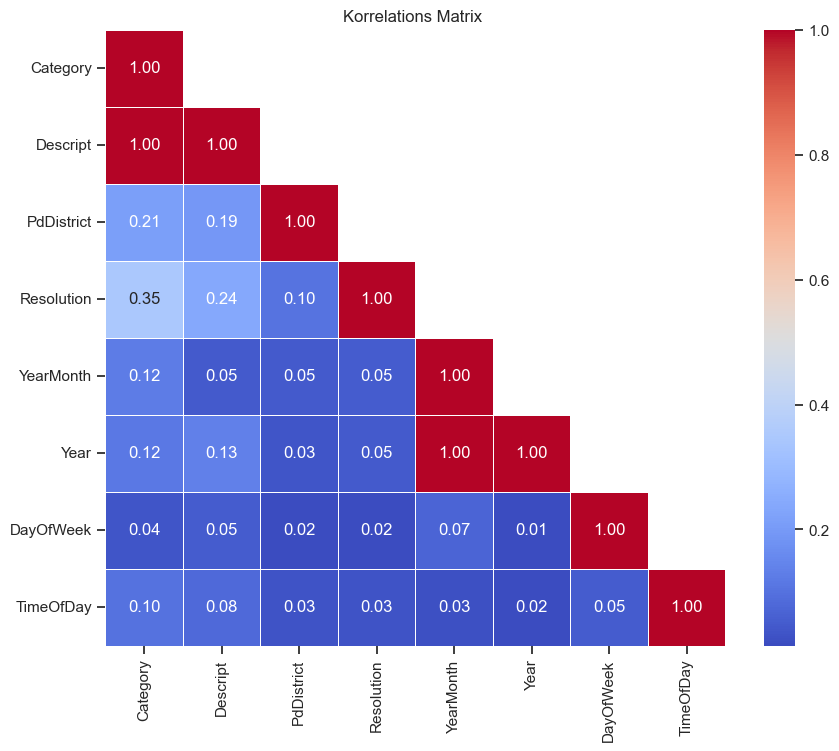

In [37]:
corr_df = corr_df.apply(pd.to_numeric, errors='coerce')

mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Korrelations Matrix ')
plt.show()

In [38]:
data_cat = train.groupby('Category').count().iloc[:, 0]. sort_values(ascending=False)
data = data_cat.reindex(np.append(np.delete(data_cat.index, 1), 'OTHER OFFENSES'))



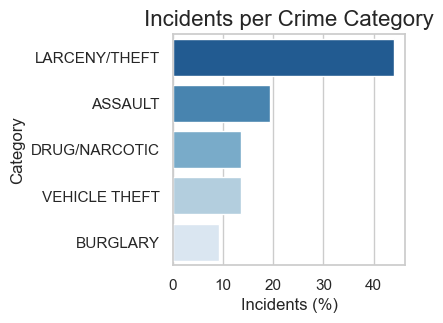

In [39]:
plt.figure(figsize=(3, 3))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        x = (data_cat.values / data_cat.values.sum()) * 100,
        y = data_cat.index,
        orient='h',
        palette="Blues_r")

plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

plt.show()

# 4. Vorbereitung

# 5. Modellierung

# 6. Ergebnis